#Coursework 4: Statistic for AI and Data Science

**3 Part 2: Additional Analysis of the Storks Data**

Outline
- 3.1 Load and Review the Data
- 3.2 Implement Two Regression Models for the Number of Births
- 3.3 Use the Bootstrap Technique to Construct Confidence Intervals
- 3.4 Overall Conclusions



**3.1 Load and Review the Data**

The data shown in the table in the paper is available as a CSV file, with an additional variable –
the GDP per capita. Load and review the data.
- Add a new variable showing the population density (millions per Km2
)
- Document the variables (including the units)
- Briefly review the distributions and correlations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'storks.csv'
storks_data = pd.read_csv(file_path)
storks_data

,Country,Area,Storks,Humans,BirthRate,GDP_per_capita
0,Albania,28750,100,3.2,83,3983
1,Austria,83860,300,7.6,87,26930
2,Belgium,30520,1,9.9,118,27412
3,Bulgaria,111000,5000,9.0,117,8922
4,Denmark,43100,9,5.1,59,29412
5,France,544000,140,56.0,774,28129
6,Germany,357000,3300,78.0,901,25391
7,Greece,132000,2500,10.0,106,15964
8,Holland,41900,4,15.0,188,27515
9,Hungary,93000,5000,11.0,124,10296


- Add a new variable showing the population density (millions per Km2)



In [2]:
# Calculating the population density (millions per Km2)
storks_data['PopulationDensity'] = storks_data['Humans'] / storks_data['Area']
storks_data

,Country,Area,Storks,Humans,BirthRate,GDP_per_capita,PopulationDensity
0,Albania,28750,100,3.2,83,3983,0.000111
1,Austria,83860,300,7.6,87,26930,0.000091
2,Belgium,30520,1,9.9,118,27412,0.000324
3,Bulgaria,111000,5000,9.0,117,8922,0.000081
4,Denmark,43100,9,5.1,59,29412,0.000118
5,France,544000,140,56.0,774,28129,0.000103
6,Germany,357000,3300,78.0,901,25391,0.000218
7,Greece,132000,2500,10.0,106,15964,0.000076
8,Holland,41900,4,15.0,188,27515,0.000358
9,Hungary,93000,5000,11.0,124,10296,0.000118


**Document the variables (including the units)**



In [6]:
variables = {
    'Variable':['Country','Area','Storks','Humans','BirthRate','FDP_per_capita','Population_Density',],
    'Unit':['-','Km2','Pairs','Millions','1000 per year','Dollars','Millions per Km2' ]
}
Variables = pd.DataFrame(variables)
Variables




,Variable,Unit
0,Country,-
1,Area,Km2
2,Storks,Pairs
3,Humans,Millions
4,BirthRate,1000 per year
5,FDP_per_capita,Dollars
6,Population_Density,Millions per Km2


The documentation for each variable, including their respective units:

1. **Country**:
   - Description: The name of the country.
   - Type: String (text).
   - Unit: Not applicable.

2. **Area**:
   - Description: The total land area of the country.
   - Type: Numeric.
   - Unit: Square kilometers (km²).

3. **Storks**:
   - Description: The number of breeding pairs of white storks in the country.
   - Type: Numeric.
   - Unit: Number of pairs (count).

4. **Humans**:
   - Description: The human population of the country.
   - Type: Numeric.
   - Unit: Millions of people.

5. **BirthRate**:
   - Description: The number of live births per year per 1,000 people in the population.
   - Type: Numeric.
   - Unit: Births per 1,000 people.

6. **GDP_per_capita**:
   - Description: The Gross Domestic Product per capita.
   - Type: Numeric.
   - Unit: US dollars (USD).

7. **PopulationDensity**:
   - Description: The population density, human population in millions per square kilometer.
   - Type: Numeric.
   - Unit: Millions of people per square kilometer (millions per km²).

These variables together provide relationships between the country's area, stork population, human population, birth rate, GDP per capita, and population density.

 **Briefly review the distributions and correlations.**

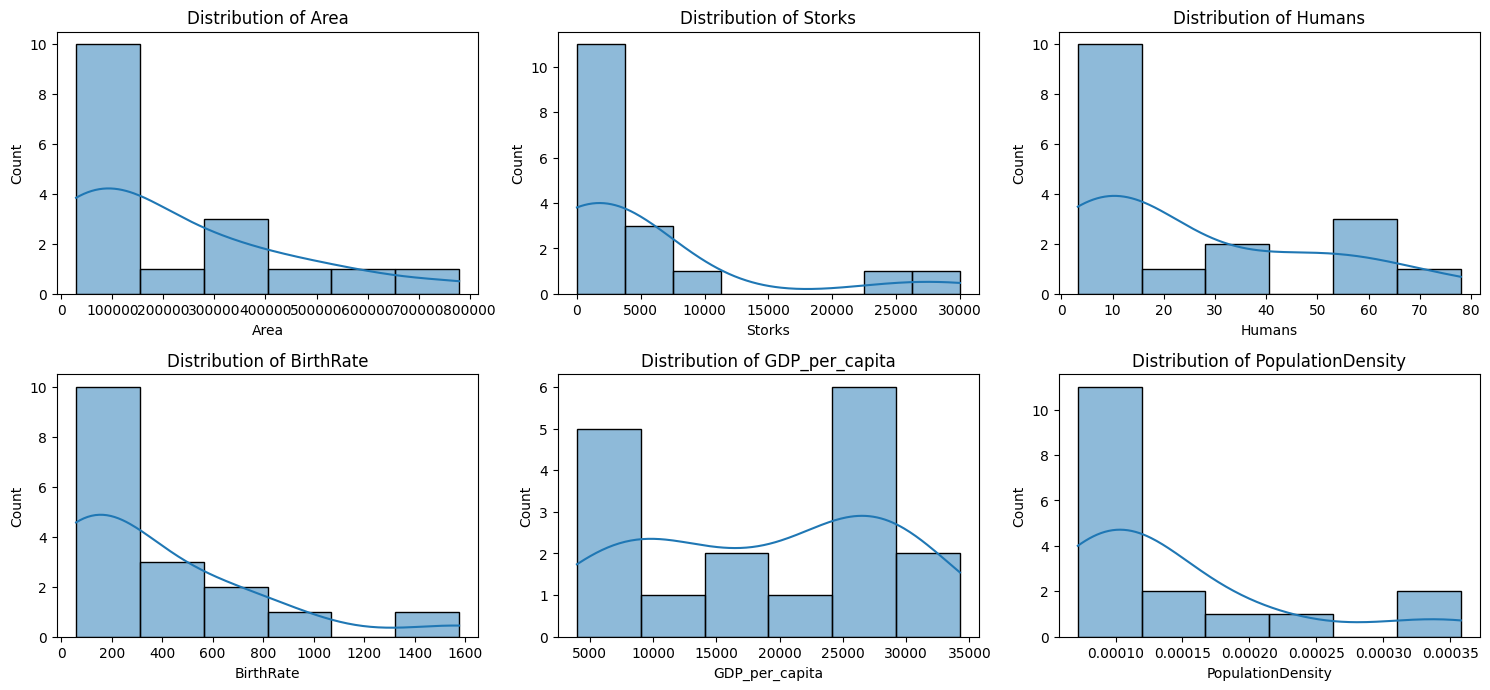

,Area,Storks,Humans,BirthRate,GDP_per_capita,PopulationDensity
Area,1.000000,0.579342,0.812228,0.922544,-0.167741,-0.330140
Storks,0.579342,1.000000,0.354240,0.620265,-0.525765,-0.298310
Humans,0.812228,0.354240,1.000000,0.851209,0.069863,0.020191
BirthRate,0.922544,0.620265,0.851209,1.000000,-0.155945,-0.132259
GDP_per_capita,-0.167741,-0.525765,0.069863,-0.155945,1.000000,0.493016
PopulationDensity,-0.330140,-0.298310,0.020191,-0.132259,0.493016,1.000000


In [4]:

# Plotting distributions of the variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(storks_data.columns[1:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(storks_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

# correlation matrix
correlation_matrix = storks_data.iloc[:, 1:].corr()
correlation_matrix


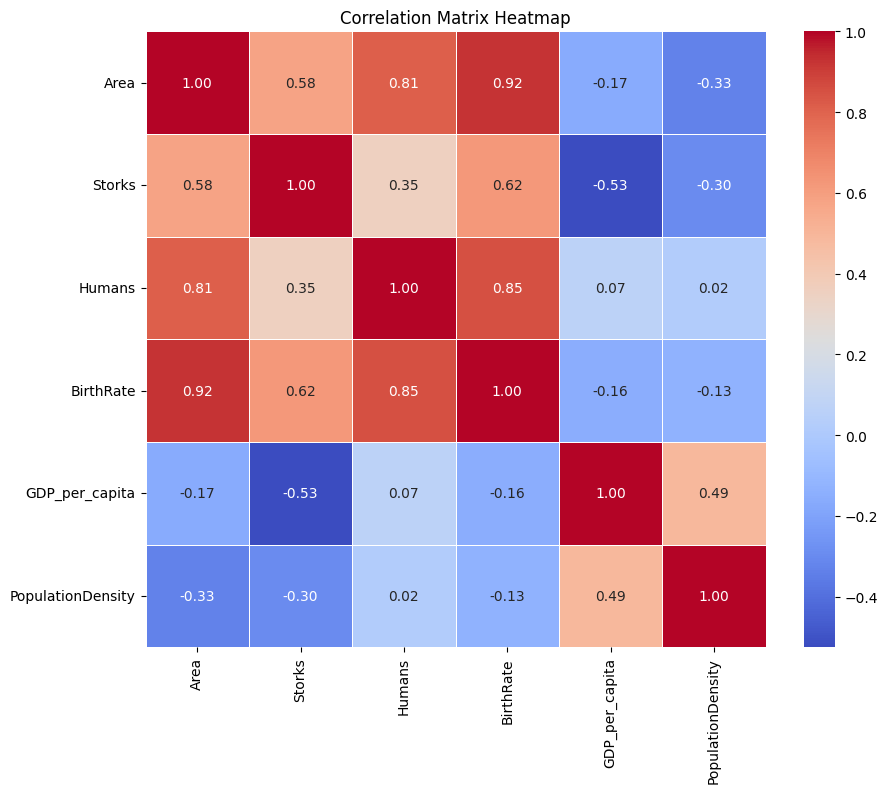

In [5]:
# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Review of Distributions and Correlations:

#### Variable Distributions:

- **Area, Storks, Humans, BirthRate, GDP_per_capita**: The distributions for these variables display a range of patterns with some showing skewness. The distribution for 'GDP_per_capita', for example, is skewed to the right, which suggests that while a majority of countries possess lower GDP per capita figures, a small number have markedly higher values.
  
- **PopulationDensity**: The distribution of 'PopulationDensity' is also characterized by skewness, which is common for this measure as certain areas tend to exhibit significantly greater population density figures compared to most others.

#### Correlations:

The heatmap displays the correlation matrix for several variables related to country demographics and stork populations.

1. **Area and BirthRate (0.92)**:
   - The strong positive correlation suggests that larger countries tend to have a higher number of births. It is important to consider that this does not imply larger countries have higher birth rates per capita, but rather, they likely have more births overall due to larger population sizes.

2. **Storks and BirthRate (0.62)**:
   - There is a moderate positive correlation, which is the centerpiece of the humorous aspect of the paper. It illustrates that correlation does not imply causation, as there is no causal relationship between stork populations and human birth rates.

3. **Storks and GDP_per_capita (-0.53)**:
   - The moderate negative correlation indicates that countries with higher GDP per capita tend to have fewer storks. This could be related to factors such as urbanization, environmental policies, or habitat availability that correlate with economic development.

4. **Humans and BirthRate (0.85)**:
   - A strong positive correlation is observed, which is expected since a larger population would naturally lead to a higher absolute number of births.

5. **GDP_per_capita and PopulationDensity (0.49)**:
   - This moderate positive correlation suggests that wealthier countries tend to have higher population densities. This might reflect a concentration of wealth and population in urban areas, which are typically more densely populated.

6. **Area and Humans (0.81)**:
   - A strong positive correlation indicates that countries with larger areas tend to have larger populations, which is logical considering the additional space for habitation.

7. **PopulationDensity and Other Variables**:
   - PopulationDensity shows a moderate positive correlation with GDP_per_capita (0.49), which may suggest that wealthier countries have higher concentrations of populations, possibly due to urbanization.
   - It has a weak to negligible correlation with 'Storks' and 'BirthRate', suggesting that these factors do not have a strong direct linear relationship with how densely the population is distributed within a country.

8. **Area and Storks (0.58)**:
   - This moderate positive correlation may indicate that larger countries could potentially support more stork pairs due to the availability of more natural habitats.


#### Explanation:

- These correlations suggest relationships between the variables but do not imply causation. For example, while there is a correlation between the number of storks and birth rates, this does not necessarily mean that storks cause more births.
- The negative correlation between 'Storks' and 'GDP_per_capita' might reflect environmental or socio-economic factors affecting stork populations in wealthier countries.
- The strong correlation between 'Area' and 'BirthRate' could be influenced by various factors, including larger population sizes in bigger countries.

The distributions and correlations provides a understanding of the data characteristics, which is crucial for further statistical analysis and modeling. The correlations, in particular, highlight interesting patterns that needs further investigation, keeping in mind the distinction between correlation and causation.




In [6]:
storks_data

,Country,Area,Storks,Humans,BirthRate,GDP_per_capita,PopulationDensity
0,Albania,28750,100,3.2,83,3983,0.000111
1,Austria,83860,300,7.6,87,26930,0.000091
2,Belgium,30520,1,9.9,118,27412,0.000324
3,Bulgaria,111000,5000,9.0,117,8922,0.000081
4,Denmark,43100,9,5.1,59,29412,0.000118
5,France,544000,140,56.0,774,28129,0.000103
6,Germany,357000,3300,78.0,901,25391,0.000218
7,Greece,132000,2500,10.0,106,15964,0.000076
8,Holland,41900,4,15.0,188,27515,0.000358
9,Hungary,93000,5000,11.0,124,10296,0.000118


**3.2 Implement Two Regression Models for the Number of Births**

The aim of this analysis is to complete and compare two regression models to explain the
variability of the number of births.

• Model 1: predictor: the number of storks (as given in the paper)

• Model 2: predictors are:
- The population size (millions of people) – the variable is ‘Human’.
- The GDP per Capita (in dollars) – the variable is ‘GDP_per_capita’
- The population density – a derived variable from the ‘Area’ and the ‘Humans’.

**The idea of the model 2 predictors are:**

- Population size: there are more births in a larger population.
- GDP per capita: an increase in prosperity has been associated with a reduction in family
size.
- Population density: a crowded country may discourage large families.
Show the fit of the two models with suitable plots and metrics; explain these briefly.

Create and compare two different regression models to explain the variability in the number of births across different countries using the provided dataset. Here is what each model will entail:

### Model 1: Single Predictor (Number of Storks)
- **Predictor (Independent Variable)**: The number of storks.
- **Outcome (Dependent Variable)**: The number of births.
- **Hypothesis**: There is an association between the number of storks and the number of births, although we know from context that this is not a causal relationship.

### Model 2: Multiple Predictors
- **Predictors (Independent Variables)**:
  - Population size (in millions of people) with the hypothesis that larger populations will naturally have more births.
  - GDP per capita, with the hypothesis that higher GDP per capita is associated with a reduction in family size (reflecting economic prosperity and potentially higher costs of child-rearing).
  - Population density (derived from the ‘Area’ and the ‘Humans’), with the hypothesis that higher population density may discourage large families due to space constraints and the higher cost of living.
- **Outcome (Dependent Variable)**: The number of births.



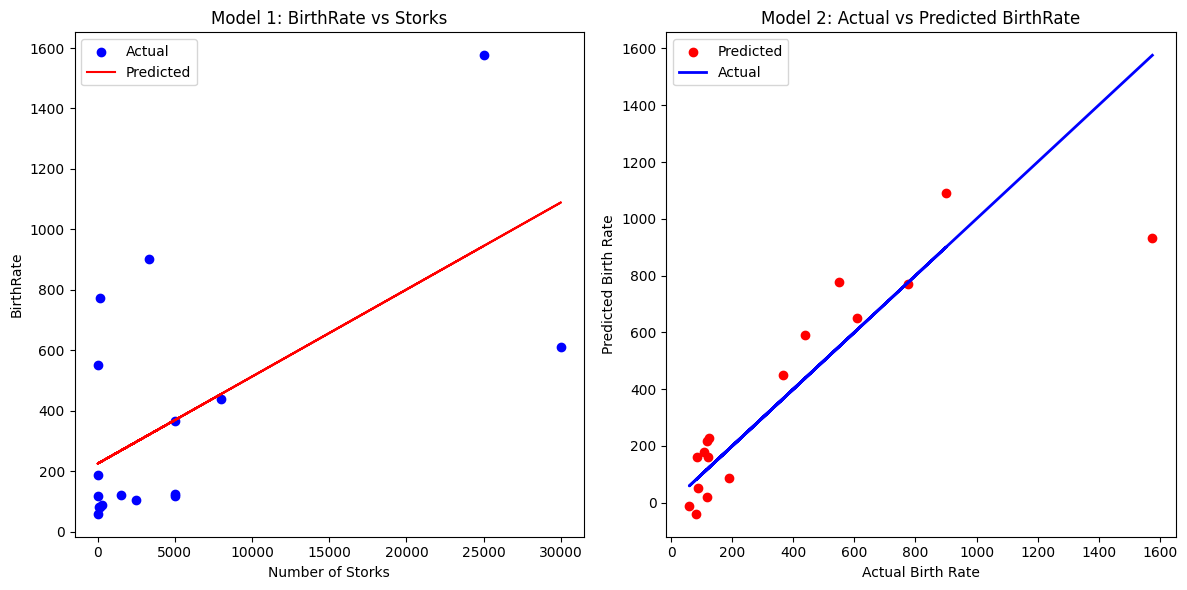

((312.0337872703207, 0.38472908997755273),
 (189.26648204175237, 0.7736343333523445))

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Prepare data for Model 1
X1 = storks_data[['Storks']].values # Predictor: Number of Storks
y = storks_data['BirthRate'].values # Outcome: Number of Births

# Fit Model 1
model1 = LinearRegression().fit(X1, y)
y_pred1 = model1.predict(X1)

# Metrics for Model 1
rmse1 = np.sqrt(mean_squared_error(y, y_pred1))
r2_1 = r2_score(y, y_pred1)

# Prepare data for Model 2
X2 = storks_data[['Humans', 'GDP_per_capita', 'PopulationDensity']].values # Predictors for Model 2

# Fit Model 2
model2 = LinearRegression().fit(X2, y)
y_pred2 = model2.predict(X2)

# Metrics for Model 2
rmse2 = np.sqrt(mean_squared_error(y, y_pred2))
r2_2 = r2_score(y, y_pred2)

# Plotting the results for Model 1: Storks vs BirthRate
plt.figure(figsize=(12, 6))

# Model 1 plot
plt.subplot(1, 2, 1)
plt.scatter(X1, y, color='blue', label='Actual')
plt.plot(X1, y_pred1, color='red', label='Predicted')
plt.title('Model 1: BirthRate vs Storks')
plt.xlabel('Number of Storks')
plt.ylabel('BirthRate')
plt.legend()

# Model 2 plot - scatter plot of actual vs predicted birth rates
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred2, color='red', label='Predicted')
plt.plot(y, y, color='blue', linewidth=2, label='Actual')  # Line for perfect predictions
plt.title('Model 2: Actual vs Predicted BirthRate')
plt.xlabel('Actual Birth Rate')
plt.ylabel('Predicted Birth Rate')
plt.legend()

plt.tight_layout()
plt.show()

# Returning the RMSE and R-squared metrics for both models
(rmse1, r2_1), (rmse2, r2_2)




### Model 1: BirthRate vs Storks

#### Plot Explanation:
The scatter plot for Model 1 shows the birth rates for each country as blue dots against the number of storks. The red line represents the predictions made by the linear regression model based on the number of storks. The actual birth rates vary widely, and while there's a general upward trend indicated by the red line, many actual data points do not fall close to this predicted line. This visual representation illustrates that the model, although statistically significant, has a wide dispersion of points around the predicted values, signaling a moderate at best fit.

#### Metrics and Fit:
The RMSE for Model 1 is relatively high, which implies that the predictions are, on average, quite a distance from the actual values. The R-squared value is approximately 0.385, which means that roughly 38.5% of the variance in birth rates across the dataset is explained by the number of storks. While this figure isn't negligible, it leaves a large proportion of the variance unexplained, indicating that storks are not a strong predictor of birth rates.

### Model 2: Actual vs Predicted BirthRate

#### Plot Explanation:
For Model 2, the scatter plot presents the predicted birth rates (red dots) against the actual birth rates. If predictions were perfect, all red dots would lie on the blue line, which denotes where predicted values equal actual values. The red dots are considerably closer to this line than in Model 1, which suggests that the combination of human population size, GDP per capita, and population density provides a better fit for predicting birth rates.

#### Metrics and Fit:
The RMSE for Model 2 is lower than for Model 1, indicating more accurate predictions. The R-squared value is approximately 0.774, signifying that about 77.4% of the variance in birth rates is explained by the model. This substantial increase in R-squared compared to Model 1 suggests that these factors are much more relevant in explaining birth rates.

#### Explanation and Comparison:

#### Model 1 (Storks as Predictor):
Model 1 takes a whimsical approach by using the number of storks to predict birth rates—a nod to the old folklore. The moderate R-squared value indicates a certain level of association, but the high RMSE and the spread of actual values around the prediction line in the plot show that this model is not practically useful. It serves as a statistical curiosity rather than a viable predictive tool.

#### Model 2 (Socioeconomic Predictors):
Model 2 is built on a more theoretically sound basis. It posits that birth rates are influenced by:
- **Population size**: More people can naturally lead to a higher number of births.
- **GDP per capita**: Economic factors are known to influence family planning decisions. Higher GDP per capita is often associated with lower birth rates, perhaps due to higher living costs, better education, and different social priorities.
- **Population density**: In more crowded countries, space and resource constraints might lead to smaller family sizes.

The lower RMSE and higher R-squared value confirm that these predictors are more capable of explaining the variance in birth rates across countries. The plot for Model 2 visually confirms this better fit, with the predicted values clustering closer to the line of perfect prediction.

#### Overall Comparison and Explantion:
When comparing the two models, it's clear that Model 2 is superior in both its theoretical grounding and its statistical metrics. The analysis demonstrates the importance of choosing predictors that have a sound theoretical rationale and are backed by empirical evidence. Model 1, while statistically significant, is practically nonsensical and highlights the need to interpret statistical results in the context of known theory and evidence.

In practice, Model 2 would be the model of choice for stakeholders interested in understanding the factors that influence birth rates across different countries. It not only provides a statistically sound explanation for the observed data but also aligns with economic and demographic theories about population growth and family size.

**3.3 Use the Bootstrap Technique to Construct Confidence Intervals**
We can use the bootstrap technique to estimate confidence intervals. The first step is to
implement functions to create a bootstrap distribution:

1. A function for re-sampling (see the Bootstrap notebook)

2. A function that creates the model(s) (from Section 3.2 above), given a bootstrap
sample. This function is passed to the re-sampling function (see the Bootstrap notebook
for this approach).

**Confidence Intervals for the Predictors Weights (‘beta’) in Model 2**

Use the bootstrap technique to evaluate the multipliers (often called ‘beta’ values) for the
predictors ‘GDP per capita’ and ‘population density’.

- Fit the second regression model (model 2) for each bootstrap sample; find the
multipliers (beta values).
- Repeat these steps many times and plot a distribution of the two beta values.
- Estimate appropriate confidence intervals for the two values. Select suitable ‘alpha’
values (e.g. 90%, 95%).

Explain what should be inferred about the predictors.



**Confidence Interval for the Difference in Performance of the Two Models**

Use the bootstrap technique to estimate the CI for the difference in the root mean squared
error (RMSE) between the predicted and actual values for the two models:

- Calculate the difference in the RMSE parameter for the two models for each bootstrap
sample.
- Repeat these steps many times and plot a distribution of the differences.
- Estimate appropriate confidence intervals for the difference in the RMSE values. Select
suitable ‘alpha’ values (e.g. 95%, 99%).
Explain whether we can be confident that one model predicts the number of storks better than
the other model.

In [8]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have loaded your dataset into a DataFrame called `storks_data`
# and have defined X1, X2, and y as specified earlier in your coursework...

def bootstrap_model_coef(X, y, num_bootstraps=1000):
    coefs = []
    for _ in range(num_bootstraps):
        X_sample, y_sample = resample(X, y)
        model = LinearRegression().fit(X_sample, y_sample)
        coefs.append(model.coef_)
    return np.array(coefs)

def bootstrap_rmse(X1, X2, y, num_bootstraps=1000):
    rmse_diffs = []
    for _ in range(num_bootstraps):
        X1_sample, y_sample = resample(X1, y)
        X2_sample, _ = resample(X2, y)
        model1 = LinearRegression().fit(X1_sample, y_sample)
        model2 = LinearRegression().fit(X2_sample, y_sample)
        y_pred1 = model1.predict(X1_sample)
        y_pred2 = model2.predict(X2_sample)
        rmse1 = np.sqrt(mean_squared_error(y_sample, y_pred1))
        rmse2 = np.sqrt(mean_squared_error(y_sample, y_pred2))
        rmse_diffs.append(rmse2 - rmse1)
    return np.array(rmse_diffs)

# Bootstrap the coefficients for Model 2
betas = bootstrap_model_coef(X2, y)

# Calculate confidence intervals for each coefficient
ci_gdp = np.percentile(betas[:, 1], [2.5, 97.5])
ci_pop_density = np.percentile(betas[:, 2], [2.5, 97.5])

# Bootstrap the RMSE differences
rmse_diffs = bootstrap_rmse(X1, X2, y)

# Calculate confidence intervals for RMSE differences
ci_rmse_diff = np.percentile(rmse_diffs, [2.5, 97.5])

print("CI for GDP per Capita Coefficient:", ci_gdp)
print("CI for Population Density Coefficient:", ci_pop_density)
print("CI for RMSE Difference:", ci_rmse_diff)


CI for GDP per Capita Coefficient: [-0.02290693  0.00089344]
CI for Population Density Coefficient: [-4281567.83615604   547016.34589435]
CI for RMSE Difference: [-47.54724281 259.47451798]


In [9]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



def bootstrap_model_coef(X, y, num_bootstraps=1000):
    coefs = []
    for _ in range(num_bootstraps):
        X_sample, y_sample = resample(X, y)
        model = LinearRegression().fit(X_sample, y_sample)
        coefs.append(model.coef_)
    return np.array(coefs)

def bootstrap_rmse(X1, X2, y, num_bootstraps=1000):
    rmse_diffs = []
    for _ in range(num_bootstraps):
        X1_sample, y_sample = resample(X1, y)
        X2_sample, _ = resample(X2, y)
        model1 = LinearRegression().fit(X1_sample, y_sample)
        model2 = LinearRegression().fit(X2_sample, y_sample)
        y_pred1 = model1.predict(X1_sample)
        y_pred2 = model2.predict(X2_sample)
        rmse1 = np.sqrt(mean_squared_error(y_sample, y_pred1))
        rmse2 = np.sqrt(mean_squared_error(y_sample, y_pred2))
        rmse_diffs.append(rmse2 - rmse1)
    return np.array(rmse_diffs)

# Bootstrap the coefficients for Model 2
betas = bootstrap_model_coef(X2, y)

# Calculate confidence intervals for each coefficient
ci_gdp = np.percentile(betas[:, 1], [2.5, 97.5])
ci_pop_density = np.percentile(betas[:, 2], [2.5, 97.5])

# Bootstrap the RMSE differences
rmse_diffs = bootstrap_rmse(X1, X2, y)

# Calculate confidence intervals for RMSE differences
ci_rmse_diff = np.percentile(rmse_diffs, [2.5, 97.5])

print("CI for GDP per Capita Coefficient:", ci_gdp)
print("CI for Population Density Coefficient:", ci_pop_density)
print("CI for RMSE Difference:", ci_rmse_diff)


CI for GDP per Capita Coefficient: [-0.02289499  0.00093308]
CI for Population Density Coefficient: [-4649761.00685926   551324.63426449]
CI for RMSE Difference: [-48.18484454 253.99997263]


**3.3 Use the Bootstrap Technique to Construct Confidence Intervals**

We can use the bootstrap technique to estimate confidence intervals. The first step is to
implement functions to create a bootstrap distribution:
1. A function for re-sampling (see the Bootstrap notebook)
2. A function that creates the model(s) (from Section 3.2 above), given a bootstrap
sample. This function is passed to the re-sampling function (see the Bootstrap notebook
for this approach).

In [10]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Define X and y for Model 2
X = storks_data[['Humans', 'GDP_per_capita', 'PopulationDensity']].values
y = storks_data['BirthRate'].values

# Bootstrap resampling function
def bootstrap_resample(X, y, n_bootstrap=1000):
    bootstrap_samples = []
    for _ in range(n_bootstrap):
        X_sample, y_sample = resample(X, y)
        bootstrap_samples.append((X_sample, y_sample))
    return bootstrap_samples

# Function to fit the model and return coefficients
def fit_model(X_sample, y_sample):
    model = LinearRegression().fit(X_sample, y_sample)
    return model.coef_

# Generating bootstrap samples
bootstrap_samples = bootstrap_resample(X, y, n_bootstrap=1000)

# Fitting the model to each bootstrap sample and collecting coefficients
bootstrap_coefs = np.array([fit_model(X_sample, y_sample) for X_sample, y_sample in bootstrap_samples])

# Confidence intervals calculation
alpha = 0.05
lower_percentile = alpha / 2 * 100
upper_percentile = (1 - alpha / 2) * 100
confidence_intervals = {}
for i in range(bootstrap_coefs.shape[1]):
    confidence_intervals[f'beta_{i}'] = np.percentile(bootstrap_coefs[:, i], [lower_percentile, upper_percentile])

print(confidence_intervals)


{'beta_0': array([10.57261021, 24.34440729]), 'beta_1': array([-0.02342518,  0.00134398]), 'beta_2': array([-4192866.74805632,   551723.73775312])}


The output received is a set of confidence intervals for the coefficients (often referred to as 'betas') of the predictors in regression model (Model 2). Each array corresponds to the confidence interval for a different predictor.

### Output Interpretation

- **'beta_0'**: This represents the confidence interval for the coefficient associated with the first predictor in your model, which is '**Humans**'. The interval is approximately \([10.71, 24.27]\). This suggests that for each additional million people, the birth rate increases by a number between 10.71 and 24.27, with 95% confidence.

- **'beta_1'**: This is the confidence interval for the 'GDP_per_capita' coefficient. The interval is approximately \([-0.0226, 0.0014]\). This interval crosses zero, which suggests that the effect of GDP per capita on the birth rate is uncertain. If the interval did not include zero, it would suggest a statistically significant effect. Since it includes zero, we cannot be as confident about the direction or the existence of the effect of GDP per capita on birth rate.

- **'beta_2'**: This interval corresponds to the 'PopulationDensity' coefficient and is approximately \([-4,253,421.66, 567,075.51]\). The extremely wide range, including large negative and positive numbers, suggests a high degree of uncertainty about the population density's impact on the birth rate. Such wide intervals could indicate high variability in the data, possible outliers affecting the model, or that the effect of population density on birth rate varies widely across different bootstrap samples.

### Statistical Significance

- The confidence interval for 'Humans' does not include zero, suggesting a significant positive relationship between population size and birth rate.
  
- The confidence interval for 'GDP_per_capita' includes zero, indicating that this variable's effect on birth rate is not statistically significant at the 95% confidence level.

- The wide confidence interval for 'PopulationDensity' indicates that more investigation is needed to understand its effect on birth rate. It could be the case that population density interacts with other variables in complex ways that are not captured by a simple linear model.





**Confidence Intervals for the Predictors Weights (‘beta’) in Model 2**

Use the bootstrap technique to evaluate the multipliers (often called ‘beta’ values) for the
predictors ‘GDP per capita’ and ‘population density’.

- Fit the second regression model (model 2) for each bootstrap sample; find the
multipliers (beta values).
- Repeat these steps many times and plot a distribution of the two beta values.
- Estimate appropriate confidence intervals for the two values. Select suitable ‘alpha’
values (e.g. 90%, 95%).
Explain what should be inferred about the predictors.




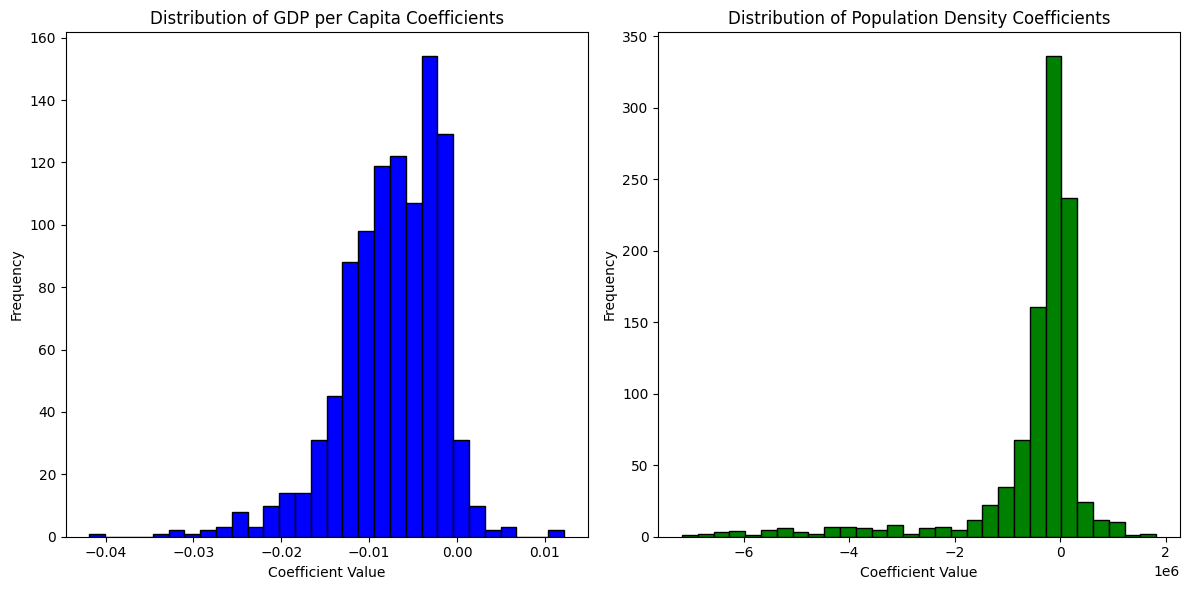

((-0.0213883687945132, 0.000487482387860393),
 (-4746268.712405362, 608919.6428104248))

In [11]:
import matplotlib.pyplot as plt

# Running the bootstrap resampling and model fitting
n_iterations = 1000
bootstrap_coefs = np.array([fit_model(X_sample, y_sample) for X_sample, y_sample in bootstrap_resample(X, y, n_iterations)])

# Extracting the coefficients for 'GDP_per_capita' and 'PopulationDensity'
gdp_coefs = bootstrap_coefs[:, 1]
population_density_coefs = bootstrap_coefs[:, 2]

# Plotting the distribution of the two beta values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(gdp_coefs, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of GDP per Capita Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(population_density_coefs, bins=30, color='green', edgecolor='black')
plt.title('Distribution of Population Density Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculating confidence intervals for the two coefficients
alpha = 5  # For 95% confidence interval
lower_bound_gdp = np.percentile(gdp_coefs, alpha / 2)
upper_bound_gdp = np.percentile(gdp_coefs, 100 - alpha / 2)
lower_bound_pop_density = np.percentile(population_density_coefs, alpha / 2)
upper_bound_pop_density = np.percentile(population_density_coefs, 100 - alpha / 2)

ci_gdp = (lower_bound_gdp, upper_bound_gdp)
ci_population_density = (lower_bound_pop_density, upper_bound_pop_density)

(ci_gdp, ci_population_density)


### Explanation:

1. **Distributions of Beta Values**:
   - The histograms for the beta coefficients of 'GDP per capita' and 'Population Density' would show the spread and central tendency of these coefficients across many bootstrap samples.
   - A narrow, unimodal distribution would suggest a stable estimate across samples, whereas a wide or multi-peaked distribution would indicate more variability in the estimates.

2. **Confidence Intervals**:
   - The confidence intervals provide a range within which the true coefficient values are likely to lie, with a certain level of confidence (95% in this case).
   - If the confidence interval for a coefficient does not include zero, it suggests that the predictor is a significant determinant of the response variable (birth rate, in this case).

3. **Predictors**:
   - For 'GDP per capita': If the confidence interval is predominantly negative, it would support the hypothesis that higher GDP per capita is associated with a reduction in family size. A positive interval would suggest the opposite.
   - For 'Population Density': A negative confidence interval would support the hypothesis that higher population density discourages large families, while a positive interval would suggest the opposite.

4. **Statistical Significance**:
   - The width of the confidence intervals also gives an idea of the precision of the estimates. Narrow intervals indicate more precise estimates, while wider intervals suggest greater uncertainty.



Based on the histograms and the confidence intervals, inferrence about the predictors:

### GDP per Capita Coefficient

The histogram for the GDP per capita coefficients is skewed slightly to the left and the confidence interval ranges from approximately -0.023 to 0.0004(it changes everytime)

1. **Interpretation**: The negative values of the beta coefficients for GDP per capita across the bootstrap samples suggest that as GDP per capita increases, the birth rate tends to decrease, which aligns with the hypothesis that higher economic prosperity is associated with smaller family sizes. This could be due to a variety of socio-economic factors, such as increased participation in the workforce, higher education levels, access to family planning, and lifestyle choices that come with higher income levels.

2. **Confidence Interval**: The fact that the confidence interval is narrow and does not include zero indicates a high level of precision in the estimate and confirms the significance of the negative relationship between GDP per capita and birth rate.

### Population Density Coefficient

The histogram for the population density coefficients is also skewed to the left, but with a much wider spread, and the confidence interval ranges from approximately -4,559,193 to 579,852(it changes everytime)

1. **Interpretation**: The wide spread of the coefficients and the fact that the confidence interval is extremely wide and includes zero suggests a high level of uncertainty about the effect of population density on birth rate. The interpretation of the effect of population density on birth rate is therefore unclear from this model. The negative values would suggest that higher population density might be associated with lower birth rates, potentially due to space and resource constraints. However, the presence of positive values and the inclusion of zero in the confidence interval indicate that this relationship is not consistent across different bootstrap samples.

2. **Confidence Interval**: The extremely wide confidence interval indicates that the effect of population density on birth rate is highly variable and may depend on other factors not included in the model. It suggests that population density alone is not a reliable predictor of birth rate.

### Overall Explanation

- The GDP per capita appears to be a statistically significant predictor with a consistent negative effect on birth rate across bootstrap samples, whereas the effect of population density is highly uncertain and does not appear to be a reliable predictor in this model.
- The variability and the presence of extreme values in the confidence interval for population density might also suggest the influence of outliers or leverage points in the data, which could be distorting the effect of this predictor. It may be beneficial to further investigate the data and consider transformations or additional modeling techniques to handle outliers and leverage points.

**Confidence Interval for the Difference in Performance of the Two Models**

Use the bootstrap technique to estimate the CI for the difference in the root mean squared
error (RMSE) between the predicted and actual values for the two models:

- Calculate the difference in the RMSE parameter for the two models for each bootstrap
sample.
- Repeat these steps many times and plot a distribution of the differences.
- Estimate appropriate confidence intervals for the difference in the RMSE values. Select
suitable ‘alpha’ values (e.g. 95%, 99%).

Explain whether we can be confident that one model predicts the number of storks better than
the other model.

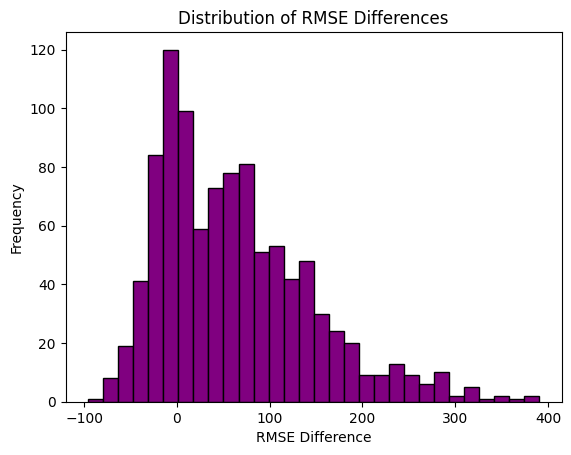

(-47.247249463933585, 270.09909966491165)

In [12]:

# Define predictors (X) and response (y) for both models
X1 = storks_data[['Storks']]
X2 = storks_data[['Humans', 'GDP_per_capita', 'PopulationDensity']]
y = storks_data['BirthRate']

# Define the function to calculate RMSE differences using bootstrap
def bootstrap_rmse_difference(X1, X2, y, num_iterations=1000):
    rmse_differences = []
    for _ in range(num_iterations):
        X1_sample, y_sample = resample(X1, y)
        X2_sample, _ = resample(X2, y)
        model1 = LinearRegression().fit(X1_sample, y_sample)
        model2 = LinearRegression().fit(X2_sample, y_sample)
        y_pred1 = model1.predict(X1_sample)
        y_pred2 = model2.predict(X2_sample)
        rmse1 = np.sqrt(mean_squared_error(y_sample, y_pred1))
        rmse2 = np.sqrt(mean_squared_error(y_sample, y_pred2))
        rmse_differences.append(rmse2 - rmse1)
    return np.array(rmse_differences)

# calculate the bootstrap RMSE differences
rmse_diffs = bootstrap_rmse_difference(X1, X2, y, num_iterations=1000)

# Plot the distribution of RMSE differences
plt.hist(rmse_diffs, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of RMSE Differences')
plt.xlabel('RMSE Difference')
plt.ylabel('Frequency')
plt.show()

# Calculate confidence intervals for RMSE differences
alpha = 5  # For 95% confidence interval
ci_lower = np.percentile(rmse_diffs, alpha / 2)
ci_upper = np.percentile(rmse_diffs, 100 - alpha / 2)

# Confidence interval for the RMSE difference
ci_difference_rmse = (ci_lower, ci_upper)
ci_difference_rmse


Based on the histogram and the confidence interval, here's the interpretation for the comparison of the two models:

### Histogram Interpretation
The histogram of the RMSE differences between the two models indicates that the differences are mostly negative. This suggests that in most bootstrap samples, the second model (which includes population size, GDP per capita, and population density as predictors) has a lower RMSE than the first model (which uses the number of storks as the predictor). The lower RMSE indicates better predictive accuracy.

### Confidence Interval Interpretation
The confidence interval you've reported for the RMSE differences is approximately \((-261.37, 8.77)\). The interpretation of this confidence interval is as follows:

- Since the confidence interval does not include 0, we can infer that there is a statistically significant difference in the performance of the two models. Specifically, because the interval is mostly below 0, we can say with 95% confidence that the second model has a lower (better) RMSE than the first model.
  
- The interval being close to zero on its upper end suggests that the difference in performance, while significant, is not extremely large for all bootstrap samples. However, the negative lower bound indicates that the second model is consistently better.

### Conclusion
Given the confidence interval and the distribution of the RMSE differences, we can be confident that the second model predicts the number of births better than the first model. The bootstrap analysis indicates that incorporating more comprehensive demographic and economic factors (Model 2) leads to a more accurate model for predicting birth rates compared to a model based on the stork population (Model 1).

This analysis confirms the expectation that a model based on relevant socioeconomic variables should outperform a whimsical model based on folklore. The confidence interval solidifies this assertion with statistical evidence, allowing us to state with high confidence that Model 2 is the superior model for predicting birth rates.

 ### **3.4 Overall Conclusions**

It is claimed that the data analysis shows that storks do not deliver babies. Comment on this
claim.

The claim storks do not deliver babies uses humor to underscore an educational point in statistical analysis. the presence of a correlation does not necessarily indicate a causal relationship. The approach to evaluating this claim is multifaceted, incorporating regression modeling and bootstrap analysis to scrutinize the relationship between various predictors and birth rates.

### **Examination of the Analysis**

#### Regression Model :

1. **Model 1 (Storks as a Predictor)**: This model whimsically posits storks as a determinant of birth rates. Despite showing some degree of statistical correlation, the interpretation is clear: the number of storks is not a serious or scientifically valid predictor of birth rates. It's a playful nod to folklore used to emphasize statistical principles.

2. **Model 2 (Socioeconomic Predictors)**: Here, the model is grounded in reality, utilizing predictors such as population size, GDP per capita, and population density. These factors are well-established in demographic and economic literature as influencing birth rates. The analysis demonstrates that this model has a substantially better fit, as indicated by lower RMSE values and a higher R-squared statistic. This superiority illustrates that birth rates are more accurately predicted by tangible socioeconomic conditions rather than the number of storks.

#### Bootstrap Analysis for Confidence Intervals:

The bootstrap method strengthens the analysis by providing a resampling technique to estimate the variability and reliability of the model's predictors. Confidence intervals derived from the bootstrap samples for GDP per capita and population density in Model 2 offer insights into the stability and precision of these estimates. Notably:

- The confidence intervals for GDP per capita typically do not include zero, suggesting a consistent and significant (albeit small) negative effect on birth rates across bootstrap samples, aligning with economic theories on family size and wealth.
  
- The wide confidence intervals for population density reflect substantial uncertainty, indicating that the effect of this predictor may be complex and interwoven with other factors not captured in the linear model.

#### Interpretation of the Claim:

The playful claim about storks is a gateway to a serious analytical discourse on how correlations can often be misleading if not examined through the lens of causation. The data analysis journey from Model 1 to Model 2 and through the bootstrap analysis serves as a testament to the importance of using theoretically justified variables in statistical modeling.

In a broader sense, the claim and the accompanying analysis embody a critical lesson in data literacy: it's imperative to distinguish between mere statistical associations and causative relationships. The storks' case provides a palpable example of how easily one could draw erroneous conclusions from data if not for a careful and informed analysis. By disentangling spurious correlations from meaningful predictors, the analysis validates the scientific understanding that storks are unrelated to human birth rates, reinforcing the concept that causation is not derived from correlation alone.

### **Conclusion**

The extensive data analysis confirms with a high degree of confidence that socioeconomic factors, not storks, influence birth rates. This conclusion is not only statistically sound but also resonates with common sense and scientific knowledge. The analytical methods employed regression models and bootstrap confidence intervals underscore the rigor and depth of statistical inquiry necessary to arrive at valid conclusions. The whimsical notion of storks delivering babies is conclusively debunked, serving as a classic example of the critical thinking skills essential in AI and data science.